# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them.

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

### Python Libraries Involved:
- pandas:- For reading and importing the Data
- Matplotlib:- For visualizing the data

In [2]:
# Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading the dataset
path = 'form.csv'
form_df = pd.read_csv(path)

# Display the first few rows of the dataset
print(form_df.head())

  birth_month   state   pet
0     January     NaN  Cats
1         JAN      CA  Cats
2        Sept  Hawaii   Dog
3     January      AK   Dog
4        July      RI  Cats


In [ ]:
# visualizing the distribution of states
plt.figure(figsize=(10, 6))
form_df['state'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribution of States')
plt.show()

In [ ]:
form_df['birth_month'].value_counts().plot(kind ='bar')
plt.title('Distribution of Birth Months')
plt.show()

## Solution

From the data exploration above, a number of issues are found:
* Missing value in the first row.
* Inconsistent formating in both the `birth_mont` and `state` columns, some entries are abbreviated while others are in full.

To clean this data, drop the row with the missing value using `dropna()`, change the values in `birth_month` into full month names, and change the values in `state` into abbreviations. Finally, identify and remove any duplicate.

In [9]:
# Drop the missing values 
form_df = form_df.dropna()

#Check the data again
print(form_df.head())


  birth_month       state   pet
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     January          AK   Dog
4        July          RI  Cats
5   September  California  Cats


In [12]:
#Mapping birth month to full name
month_mapping = {
    'JAN' : 'January',
    'Sept' : 'September'
}

#Replcaing the month mapping into the data
form_df['birth_month'] = form_df['birth_month'].replace(month_mapping)

#Checking
print(form_df)

  birth_month       state   pet
1     January          CA  Cats
2   September      Hawaii   Dog
3     January          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


In [51]:
# Dictionary to map full state names to abbreviations
state_mapping = {
    'California' : 'CA',
    'Florida' : 'FL',
    'Hawaii' : 'HI'
}

#Replacing the State abbreviation into the data
form_df['state'] = form_df['state'].replace(state_mapping)

#Checking the data
print(form_df)

      birth_month state   pet  index
index                               
1         January    CA  Cats      1
2       September    Hi   Dog      2
3         January    AK   Dog      3
4            July    RI  Cats      4
5       September    CA  Cats      5
6           April    CA   Dog      6
7        November    FL   Dog      7
8        December    FL  Cats      8


In [46]:
#Checking for Duplicate
duplicates = form_df[form_df.duplicated()]
print(duplicates)

#droping the duplicate
form_df = form_df.drop_duplicates()
 
#Rest index coloumn
form_df['index'] = range(1, len(form_df) + 1)

print(form_df)


Empty DataFrame
Columns: [birth_month, state, pet]
Index: []
      birth_month state   pet  index
index                               
1         January    CA  Cats      1
2       September    Hi   Dog      2
3         January    AK   Dog      3
4            July    RI  Cats      4
5       September    CA  Cats      5
6           April    CA   Dog      6
7        November    FL   Dog      7
8        December    FL  Cats      8


### Visualized the Data (Solution)

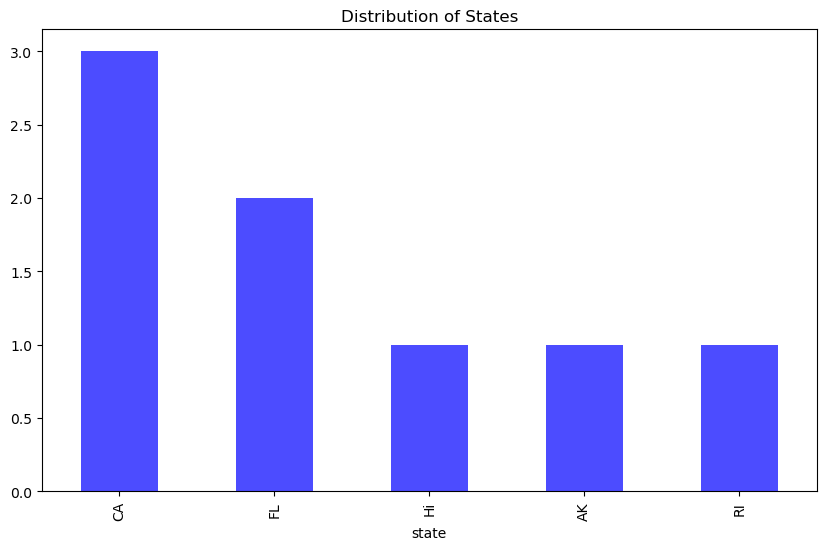

In [49]:
# visualizing the distribution of states
plt.figure(figsize=(10, 6))
form_df['state'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribution of States')
plt.show()

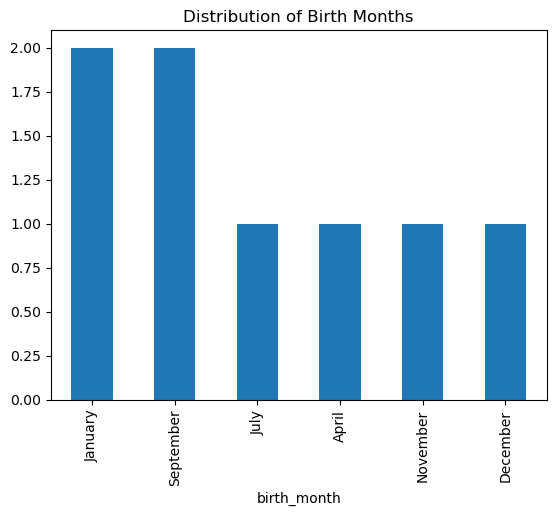

In [52]:
form_df['birth_month'].value_counts().plot(kind ='bar')
plt.title('Distribution of Birth Months')
plt.show()

# COMPLETE ASSIGNMENT